In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib ipympl

from jfunctions import *

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/moisture


In [2]:
#Load simulation data
b, phi, W, Scum, F_b, F_phi, M, times = load_data('th1_xz', 'th4_xz', 'b_phip_W', 'b_phip_S', 'b_phip_F1', 'b_phip_F4', 'b_phip_M')
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Get dir locations from param file
base_dir, run_dir, save_dir, version = read_params('./params.dat')
print(base_dir)

bbins, phibins = load_bins(save_dir, 'PVD_bbins', 'PVD_phipbins')

times, t0_idx = calibrate_time(save_dir, times)


# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['B_xy', 'B_xz', 'B_yz', 'Ent_phic_flux_int', 'Ent_phic_flux_rec', 'Ent_phip_flux_int', 'Ent_phip_flux_rec', 'Ent_phiv_flux_int', 'Ent_phiv_flux_rec', 'N2_xy', 'N2_xz', 'N2_yz', 'Re_b_xy', 'Re_b_xz', 'Re_b_yz', 'Ri_xy', 'Ri_xz', 'Ri_yz', 'b_phic_F1', 'b_phic_F3', 'b_phic_Jc', 'b_phic_K', 'b_phic_M', 'b_phic_S', 'b_phic_W', 'b_phip_F1', 'b_phip_F4', 'b_phip_M', 'b_phip_S', 'b_phip_W', 'b_phiv_F1', 'b_phiv_F2', 'b_phiv_Jv', 'b_phiv_M', 'b_phiv_S', 'b_phiv_W', 'chi1_xy', 'chi1_xz', 'chi1_yz', 'chi2_xy', 'chi2_xz', 'chi2_yz', 'chi3_xy', 'chi3_xz', 'chi3_yz', 'chi4_xy', 'chi4_xz', 'chi4_yz', 'diff_th1_xy', 'diff_th1_xz', 'diff_th1_yz', 'diff_th2_xy', 'diff_th2_xz', 'diff_th2_yz', 'diff_th3_xy', 'diff_th3_xz', 'diff_th3_yz', 'diff_th4_xy', 'diff_th4_xz', 'diff_th4_yz', 'epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'kappa_t3_xy', 'kappa_t3_xz', 'kappa_t3_yz', 'kappa_t4_xy', 'kappa_t4_xz',

In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 15.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.2, 'phiv_factor': 1.0, 'phic_factor': 0.3, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'phi0': 0.26, 'alpha': 67.0, 'beta': 0.51, 'tau': 0.1, 'q0': 15.0, 'phiv_min': 0.0002, 'phic_min': 0.0002, 'T': 10.0, 'Trelax': 0.5, 'w_s': 0.0, 'INIT_NOISE': 1e-08, 'shear_rate': 0.2, 'Nx': 256, 'Ny': 256, 'Nz': 257, 'Nth': 4}


In [4]:
#Create grids
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

db = bbins[1] - bbins[0]
dphi = phibins[1] - phibins[0]

sx, sy = np.meshgrid(np.append(bbins-db/2, bbins[-1]+db/2),
        np.append(phibins - dphi/2, phibins[-1] + dphi/2))
sxf, syf = np.meshgrid(bbins, phibins)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 97
Dimensional times:  [-3.89326659 -3.64326659 -3.39326659 -3.14326659 -2.89326659 -2.64326659
 -2.39326659 -2.14326659 -1.89326659 -1.64326659 -1.39326659 -1.14326659
 -0.89326659 -0.64326659 -0.39326659 -0.14326659  0.          0.25
  0.5         0.75        1.          1.25        1.5         1.75
  2.          2.25        2.5         2.75        3.          3.25
  3.5         3.75        4.          4.25        4.5         4.75
  5.          5.25        5.5         5.75        6.          6.25
  6.5         6.75        7.          7.25        7.5         7.75
  8.          8.25        8.5         8.75        9.          9.25
  9.5         9.75       10.         10.25       10.5        10.75
 11.         11.25       11.5        11.75       12.         12.25
 12.5        12.75       13.         13.25       13.5        13.75
 14.         14.25       14.5        14.75       15.         15.25
 15.5        15.75       16.         16.25       16.5        16.75
 17.     

In [5]:
# Set-up
for i in range(1, NSAMP):
    Scum[i] += Scum[i-1]

S = np.gradient(Scum, md['SAVE_STATS_DT'], axis=0)
div_F = np.gradient(F_b, bbins, axis=2) + np.gradient(F_phi, phibins, axis=1)

W = np.where(W == 0, np.NaN, W)
S = np.where(S == 0, np.NaN, S)
M = np.where(M == 0, np.NaN, M)
F_b = np.where(F_b == 0, np.NaN, F_b)
F_phi = np.where(F_phi == 0, np.NaN, F_phi)
M = np.where(M == 0, np.NaN, M)
Scum = np.where(Scum == 0, np.NaN, Scum)
div_F = np.where(div_F == 0, np.NaN, div_F)

# Non-dimensionalising
F0 = compute_F0(save_dir, md, tstart_ind = 2*4, verbose=False, zbot=0.7, ztop=0.95, plot=False, moist=True, vapour=True)
N = np.sqrt(md['N2'])
T = np.power(N, -1)
L = np.power(F0, 1/4) * np.power(N, -3/4)

# CURRENTLY OMITTED!

In [6]:
# Thresholding
tracer_thresh = 5e-4
tracer_thresh_low = 1e-3
plot_plume = np.where(
        np.logical_or(
            np.logical_and(phi > tracer_thresh_low, Yf < md['H']-L),
            np.logical_and(phi > tracer_thresh, Yf >= md['H']-L)),
        phi, np.NaN)
plot_env = np.where(np.logical_and(np.isnan(plot_plume), Yf >= md['H']-L), b, np.NaN)

b = np.where(b < 1e-4, 0, b)

In [7]:
# Create colourmaps
S_bounds = np.linspace(-1e-6,  1e-6, 9)
S_norm = colors.BoundaryNorm(boundaries=S_bounds, ncolors=256)

colors_red = plt.cm.coolwarm(np.linspace(0.53, 1, 32))
colors_blue = plt.cm.coolwarm(np.linspace(0, 0.47, 32))
all_colors = np.vstack((colors_blue, colors_red))
custom_cmap = colors.LinearSegmentedColormap.from_list("cmap", all_colors)

In [8]:
# Set plot limits and contours
bmax_plot = bbins[-1]
phimax_plot = phibins[-1]

contours_b = np.linspace(1e-4, bmax_plot, 10)[1:]
contours_phi = np.linspace(phibins[0] - dphi/2, phimax_plot, 10)
mid_tracer_thresh = contours_phi[2]

In [9]:
# Compute zmax
tracer_data_vert = np.where(phi[:, :, int(md['Nx']/2)] >= mid_tracer_thresh,
        phi[:, :, int(md['Nx']/2)], 0)
plume_vert = np.where(tracer_data_vert >= mid_tracer_thresh, 1, 0)
heights = []
for i in range(len(plume_vert)):
    stuff = np.where(plume_vert[i] == 1)[0]
    if len(stuff) == 0:
        heights.append(0)
    else:
        heights.append(gzf[np.max(stuff)+1])

In [10]:
def decorate(fig, axs, step):
    fig.suptitle("t = {0:.2f} s".format(times[step]))

    for a in axs.ravel()[1:]:
        a.set_xlim(bbins[0]-db/2, bmax_plot)
        a.set_ylim(phibins[0]-dphi/2, phimax_plot)

        a.set_xlabel(r"$b$")
        a.set_ylabel(r"$\phi$")

    axs[0,0].set_xlim(0, 0.4)
    axs[0,0].set_aspect(1)
    axs[0,0].set_ylim(md['H']-L, md['H']+7*L)
    axs[0,0].set_xlabel(r"$x$")
    axs[0,0].set_ylabel(r"$z$")

    im_phi.set_clim(phibins[0]-dphi/2, phimax_plot)
    cont_phi.set_clim(phibins[0]-dphi/2, phimax_plot)
    im_W.set_clim(0, 1e-5)
    im_W_F.set_clim(0, 1e-5)

    axs[0,0].set_title(r"(a) tracer field $\phi$")
    axs[0,1].set_title(r"(b) volume distribution $W$")
    axs[0,2].set_title(r"(c) flux distribution $\mathbf{F}$")
    axs[1,0].set_title(r"(d) cumulative source distribution $\int S \, \mathrm{d}t$")
    axs[1,1].set_title(r"(e) source distribution $S$")
    axs[1,2].set_title(r"(f) cumulative mixed volume distribution $M$")

In [11]:
def decorate_cb(fig, axs, step):
    cb_W = fig.colorbar(im_W, ax=axs[0,1], location='right', shrink=0.8)
    cb_W.set_label("$W$", rotation=0, labelpad=5)

    cb_env = fig.colorbar(im_b_edge, ax=axs[0,0], location='right', shrink=0.8)
    cb_env.set_label(r"$b$", rotation=0, labelpad=5)

    #cb_phi = fig.colorbar(cont_phi, ax=axs[0,0], location='right', shrink=0.8)
    #cb_phi.set_label(r"$\phi$", rotation=0, labelpad=5)

    cb_plume = fig.colorbar(im_phi, ax = axs[0,0], location='right', shrink=0.8, extend='max')
    cb_plume.set_label(r"$\phi$", rotation=0, labelpad=5)

    cb_Scum = fig.colorbar(im_Scum, ax=axs[1,0], location='right', shrink=0.8)
    cb_Scum.set_label("cumulative $S$", rotation=0, labelpad=5)

    cb_S = fig.colorbar(im_S, ax=axs[1,1], location='right', shrink=0.8)
    cb_S.set_label("$S$", rotation=0, labelpad=5)

    cb_M = fig.colorbar(im_M, ax=axs[1,2], location="right", shrink=0.8)
    cb_M.set_label("$M$", rotation=0, labelpad=5)

    cb_WF = fig.colorbar(im_W, ax = axs[0,2], location='right', shrink=0.8)
    cb_WF.set_label("$W$", rotation=0, labelpad=5)

In [12]:
def plots(fig, axs, step):
    global im_b_edge, im_phi, im_W, im_Scum, im_S, im_M, im_W_F, cont_phi

    im_b_edge = axs[0,0].contour(Xf, Yf, plot_env[step], levels=contours_b, cmap='cool', alpha=0.8)
    im_phi = axs[0,0].pcolormesh(X, Y, plot_plume[step], cmap='viridis', alpha=0.5)
    cont_phi = axs[0,0].contour(Xf, Yf, plot_plume[step], cmap='viridis', levels=contours_phi, ls='--')

    im_W = axs[0,1].pcolormesh(sx, sy, W[step], cmap='plasma')
    im_Scum = axs[1,0].pcolormesh(sx, sy, Scum[step], cmap='coolwarm', norm=S_norm)
    im_S = axs[1,1].pcolormesh(sx, sy, S[step], cmap='coolwarm', norm=S_norm)

    M_lim = np.nanmax(M[step])
    im_M = axs[1,2].pcolormesh(sx, sy, M[step], cmap=custom_cmap,
            norm=colors.CenteredNorm(halfrange = .6*M_lim))

    im_W_F = axs[0,2].pcolormesh(sx, sy, W[step], cmap='plasma', alpha=0.5)

    fn = 2 # filter_num
    im_F = axs[0,2].quiver(sxf[::fn,::fn], syf[::fn, ::fn], F_b[step, ::fn, ::fn],
            F_phi[step, ::fn, ::fn], angles='xy', units='xy', pivot='mid',
            fc='k', ec='k', linewidth=0.1)

    decorate(fig, axs, step)

/tmp/ipykernel_813371/3926527365.py:6: UserWarning: The following kwargs were not used by contour: 'ls'
  cont_phi = axs[0,0].contour(Xf, Yf, plot_plume[step], cmap='viridis', levels=contours_phi, ls='--')


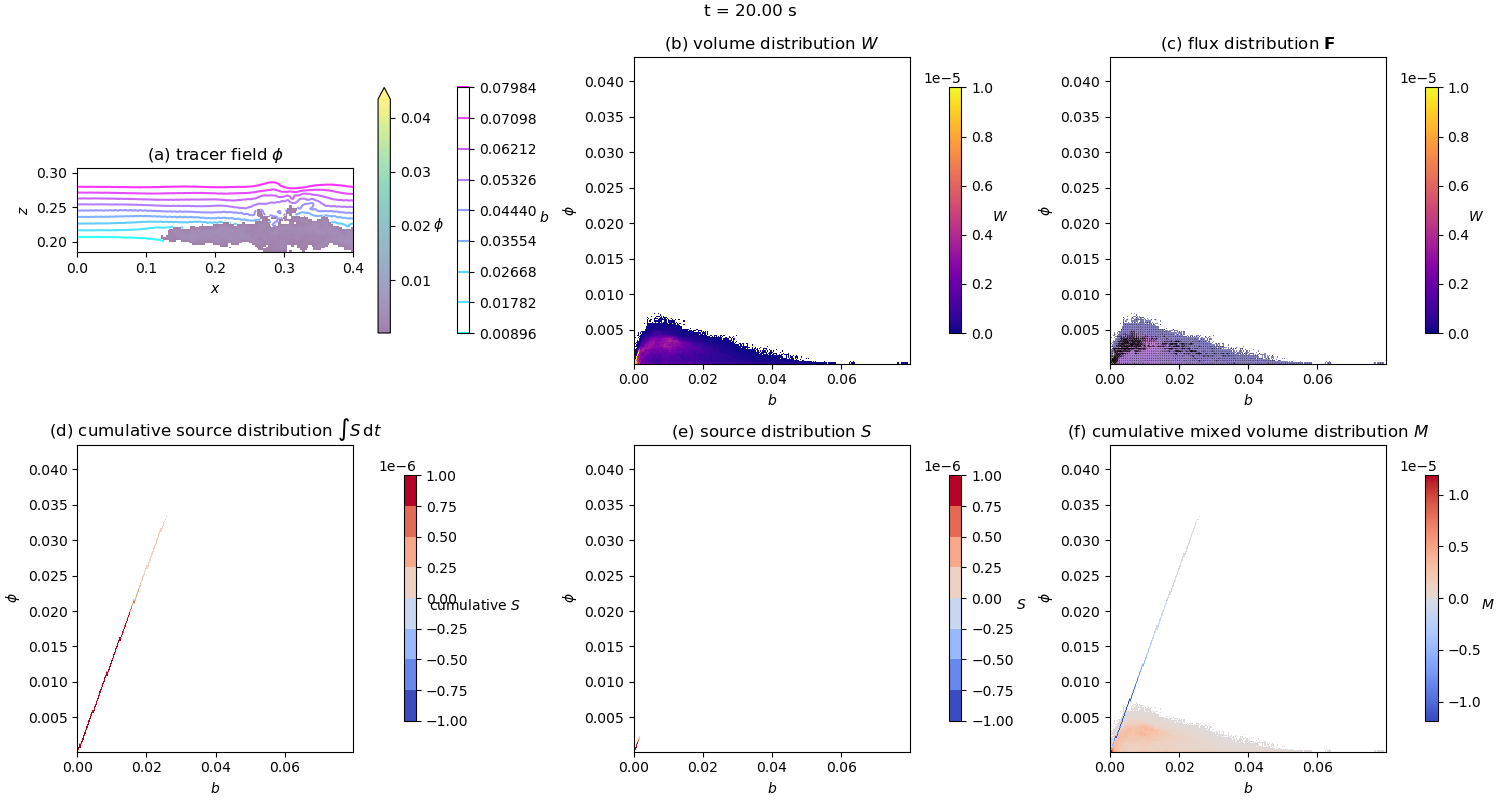

In [13]:
# Plotting loop
fig, axs = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)

plots(fig, axs, -1)
decorate_cb(fig, axs, -1)

def animate(step):
    for a in axs.ravel():
        a.clear()

    plots(fig, axs, step)
    decorate(fig, axs, step)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, bitrate=-1)

anim = animation.FuncAnimation(fig, animate, interval=250, frames=list(range(t0_idx, NSAMP)), repeat=True)
now = datetime.now()
    
#save_fig(anim, '/home/cwp29/tmp/moisture/{0}_p.mp4'.format(base_dir.split('/')[-2]))